In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [175]:
train_data= pd.read_csv('mnist_train.csv')

# Creating Small Balanced Subset of the data

In [168]:
train_data["label"].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

# I will be taking 1000 record of each class to balance and avoid Singular Matrix and memory leaks

In [105]:
train_data[train_data["label"]==0].iloc[0:1000,:]

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
num_classes = 10
new_train_data= pd.DataFrame()
for i in range (num_classes):
    new_train_data= new_train_data.append( train_data[train_data["label"]==i].iloc[0:300,:], ignore_index=True)


In [171]:
new_train_data.drop(columns=["label"], index=None, inplace=True)

In [119]:
new_train_data.columns

Index(['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=784)

In [120]:
new_train_data.to_csv("mnist_small_subset.csv", index=False)

# Loading the new small subset

In [110]:
new_train_data= pd.read_csv("mnist_small_subset.csv")
new_train_data

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cleaning fruit_colored dataset to be used for better testing 

In [127]:
color_data= pd.read_table("fruit_data_with_colors.txt")
color_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


# min max scaling for mass width height 

In [128]:
for i in range(3):
    max_element= color_data.iloc[:,i+3].max()
    min_element= color_data.iloc[:,i+3].min()
    print(max_element)
    color_data.iloc[:,i+3]=(color_data.iloc[:,i+3]-min_element)/(max_element- min_element)
    
color_data.head()

362
9.6
10.5


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,0.405594,0.684211,0.507692,0.55
1,1,apple,granny_smith,0.363636,0.578947,0.430769,0.59
2,1,apple,granny_smith,0.349650,0.421053,0.492308,0.60
3,2,mandarin,mandarin,0.034965,0.105263,0.107692,0.80
4,2,mandarin,mandarin,0.027972,0.052632,0.092308,0.79


In [129]:
color_data["fruit_name"].nunique()

4

# One hot encoding for the name and subtype

In [134]:
onehot_color_data_name = pd.get_dummies(color_data.fruit_name, prefix='fruit_name')
onehot_color_data_subtype = pd.get_dummies(color_data.fruit_subtype, prefix='fruit_subtype')
# onehot_color_data_subtype.reset_index(drop= True, inplace= True)
# onehot_color_data_name.reset_index(drop= True, inplace= True)

new_color_data = pd.concat(
    [
        color_data.reset_index(drop=True),
        onehot_color_data_name.reset_index(drop=True),
        onehot_color_data_subtype.reset_index(drop=True)
    ],
    axis=1,
    ignore_index=True,
)

new_color_data_columns = [
    list(color_data.columns),
    list(onehot_color_data_name.columns),
    list(onehot_color_data_subtype.columns)
]
    
flatten = lambda nested_lists: [item for sublist in nested_lists for item in sublist]

new_color_data.columns = flatten(new_color_data_columns)
# I removed class 2 as it is under-represented and imposes imbalance to the data
new_color_data.drop(index= [3,4,5,6,7], columns=["fruit_name", "fruit_subtype"], inplace=True)

# new labels to range from 0 to 2 representing the three classes
replacing_dict= {1:0,3:1, 4:2}
new_color_data["fruit_label"].replace(replacing_dict, inplace=True)

# new_color_data= color_data.append(onehot_color_data, ignore_index=True)
new_color_data.head()

,fruit_label,mass,width,height,color_score,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,0,0.405594,0.684211,0.507692,0.55,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0.363636,0.578947,0.430769,0.59,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0.349650,0.421053,0.492308,0.60,1,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0.356643,0.342105,0.584615,0.92,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0.335664,0.421053,0.461538,0.89,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [135]:
new_color_data.to_csv("cleaned_fruits_with_colors.csv", index=False)

# Loading the fruit_cleaned data 

In [141]:
color_cluster_data=pd.read_csv("cleaned_fruits_with_colors.csv")
color_cluster_data.head()

,fruit_label,mass,width,height,color_score,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,0,0.405594,0.684211,0.507692,0.55,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0.363636,0.578947,0.430769,0.59,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0.349650,0.421053,0.492308,0.60,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0.356643,0.342105,0.584615,0.92,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0.335664,0.421053,0.461538,0.89,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [142]:
color_labels= color_cluster_data.fruit_label

In [143]:
color_cluster_data.drop(columns= ["fruit_label"], index=None, inplace= True)
color_cluster_data.head()

,mass,width,height,color_score,fruit_name_apple,fruit_name_lemon,fruit_name_mandarin,fruit_name_orange,fruit_subtype_braeburn,fruit_subtype_cripps_pink,fruit_subtype_golden_delicious,fruit_subtype_granny_smith,fruit_subtype_mandarin,fruit_subtype_selected_seconds,fruit_subtype_spanish_belsan,fruit_subtype_spanish_jumbo,fruit_subtype_turkey_navel,fruit_subtype_unknown
0,0.405594,0.684211,0.507692,0.55,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.363636,0.578947,0.430769,0.59,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.349650,0.421053,0.492308,0.60,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.356643,0.342105,0.584615,0.92,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.335664,0.421053,0.461538,0.89,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [144]:
class GaussianMixtures:
    def __init__(self, k, X, iters=5):
        self.k = k
        self.iters = iters
        
        ### initialize params
        n,m = X.shape

        self.priors = np.full(shape=self.k, fill_value=1/self.k)
        
        self.p_MAP = np.full(shape=(n,m), fill_value=1/self.k)
        
        
        # Pick K mu and sigma from the data points
        random_row = np.random.randint(low=0, high=n, size=self.k)
        
        self.mu = [  X.iloc[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update p_MAP and priors holding mu and sigma constant
        self.p_MAP = self.predict_proba(X)
        
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding priors and p_MAP constant
        self.priors = self.p_MAP.mean(axis=0) # get phi (priors)
        
        for i in range(self.k): # get mu and sigma
            p = self.p_MAP[:, [i]]
            total_p = p.sum()
            self.mu[i] = (X * p).sum(axis=0) / total_p
            self.sigma[i] = np.cov(X.T, aweights=(p/total_p).flatten(), bias=True)

    def fit(self, X):
        for iteration in range(self.iters):
            self.e_step(X)
            self.m_step(X)
            
            
            
    def predict_proba(self, X):
        likelihood = np.zeros( (X.shape[0], self.k) )
        for i in range(self.k):
            self.sigma[i] = np.nan_to_num(0.5)
            distribution = ss.multivariate_normal(mean=self.mu[i], cov=self.sigma[i], allow_singular=True)
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.priors
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        p_MAP = numerator / denominator
        return p_MAP
    
    def predict(self, X):
        p = self.predict_proba(X)
        return np.argmax(p, axis=1)

In [145]:
gmm = GaussianMixtures(k=3, X=color_cluster_data, iters=1000)
gmm.fit(color_cluster_data)

In [146]:
gmm.p_MAP

array([[0.17006018, 0.06672647, 0.76321334],
       [0.16768914, 0.06825406, 0.7640568 ],
       [0.16651249, 0.07345522, 0.76003229],
       [0.15113888, 0.06788722, 0.7809739 ],
       [0.15049502, 0.06435825, 0.78514673],
       [0.14945171, 0.06826163, 0.78228665],
       [0.15058155, 0.06757322, 0.78184523],
       [0.14886049, 0.06775351, 0.78338599],
       [0.1509743 , 0.06790055, 0.78112515],
       [0.15052488, 0.06540568, 0.78406944],
       [0.15068532, 0.06417964, 0.78513504],
       [0.15100058, 0.06587807, 0.78312135],
       [0.15146402, 0.06607363, 0.78246235],
       [0.14242873, 0.06081643, 0.79675484],
       [0.14233554, 0.06153798, 0.79612648],
       [0.14280718, 0.06163576, 0.79555707],
       [0.14230723, 0.06222014, 0.79547263],
       [0.14094521, 0.06243004, 0.79662475],
       [0.14397481, 0.06157374, 0.79445145],
       [0.71014212, 0.06067261, 0.22918527],
       [0.71248528, 0.05854241, 0.22897231],
       [0.7154377 , 0.05600521, 0.22855709],
       [0.

In [147]:
gmm.p_MAP.shape

(54, 3)

In [148]:
np.array(gmm.mu)

array([[0.37970278, 0.43088692, 0.60960808, 0.76640087, 0.14953577,
        0.10803997, 0.        , 0.74242426, 0.03918346, 0.04462723,
        0.03939863, 0.02632644, 0.        , 0.22458938, 0.05353307,
        0.11162386, 0.40621102, 0.0545069 ],
       [0.26619071, 0.2198199 , 0.70230549, 0.72860139, 0.09322913,
        0.82460526, 0.        , 0.08216561, 0.02517   , 0.02774672,
        0.02469061, 0.0156218 , 0.        , 0.03015076, 0.26798578,
        0.01313237, 0.03888249, 0.55661948],
       [0.32816239, 0.41355189, 0.56659612, 0.773316  , 0.69254131,
        0.13617443, 0.        , 0.17128426, 0.18200277, 0.22205957,
        0.18210856, 0.10637042, 0.        , 0.06026463, 0.06505938,
        0.03193549, 0.07908414, 0.07111505]])

In [149]:
np.array(gmm.sigma).shape

(3, 18, 18)

# Q1b: Our main data contains four  clusters and our EM algorithm succeeded to cluster the data into 3 clusters

In [153]:
color_prediction= gmm.predict(color_cluster_data)

# our labels starts from 1 to 4
color_prediction= np.array(color_prediction)

In [154]:
np.array(color_prediction)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [155]:
np.array(color_labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

# Q1c:

In [156]:
from sklearn.metrics.cluster import contingency_matrix
print(contingency_matrix(color_labels, color_prediction))
mapper = np.argmax(contingency_matrix(color_labels, color_prediction), axis=1)
mapper

[[ 0  0 19]
 [19  0  0]
 [ 0 16  0]]


array([2, 0, 1], dtype=int64)

In [158]:
from sklearn.metrics import classification_report
print(classification_report(mapper[color_labels], color_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        19

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



# Q1d: Given the fact that we had to use another dataset, plotting images will make no sense as it will not represent any useful information (e.g. it will not plot number 2 for cluster 2)

In [160]:
import matplotlib.pyplot as plt

In [164]:
len(color_cluster_data.columns)

18

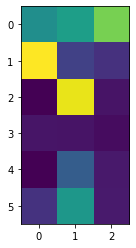

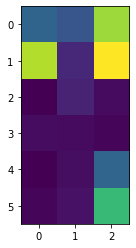

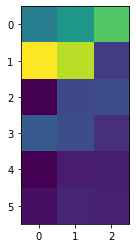

In [166]:
for m in gmm.mu:
    plt.imshow(np.array(m).reshape(6,3))
    plt.show()

# part b,c,d with ready-implementation EM 

In [176]:
train_data.drop(columns=["label"], index=None, inplace=True)

In [177]:
from sklearn import mixture
exp_max = mixture.GaussianMixture(n_components=10,covariance_type='full',max_iter = 100)
exp_max.fit(train_data.values)

GaussianMixture(n_components=10)

In [178]:
test_data= pd.read_csv("mnist_test.csv")
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
y_label= test_data.label
test_data.drop(columns= "label", index= None, inplace= True)

In [180]:
y_pred= exp_max.predict(test_data.values)

In [181]:
from sklearn.metrics.cluster import contingency_matrix
print(contingency_matrix(y_label, y_pred))
mapper = np.argmax(contingency_matrix(y_label, y_pred), axis=1)
mapper

[[277  48   1  31  10 595   1  15   2]
 [188 920   0   4   6  10   0   4   3]
 [100  62   3  46 118 437   0  67 199]
 [351 203   3  13  14 220   6 179  21]
 [397 220  58   8   4 226  23  33  13]
 [599  83   6  19   3 140  10  26   6]
 [ 23 116   0 336 413  56   0   0  14]
 [120 269 154   0   0  15 446  21   3]
 [560 256   3   7   2 106   7  30   3]
 [228 427 188   0   0  19 130  13   4]]


array([5, 1, 5, 0, 0, 0, 4, 6, 0, 1], dtype=int64)

In [182]:
from sklearn.metrics import classification_report
print(classification_report(mapper[y_label], y_pred))

              precision    recall  f1-score   support

           0       0.67      0.49      0.57      3858
           1       0.52      0.63      0.57      2144
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.72      0.43      0.54       958
           5       0.00      0.00      0.00      2012
           6       0.01      0.01      0.01      1028
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.37     10000
   macro avg       0.19      0.16      0.17     10000
weighted avg       0.44      0.37      0.39     10000



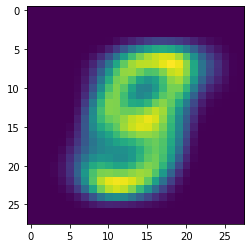

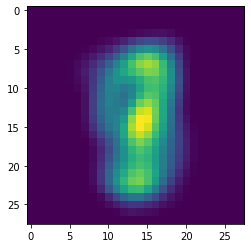

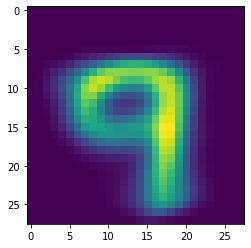

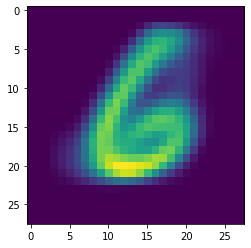

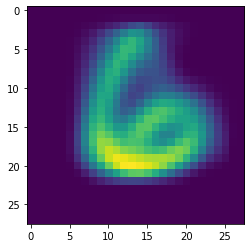

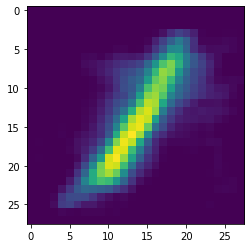

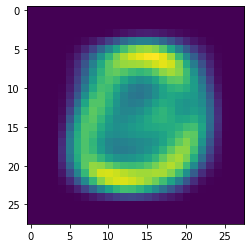

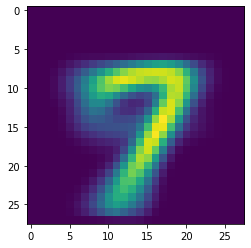

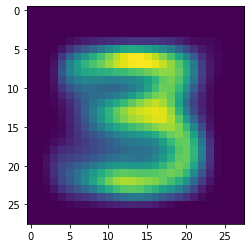

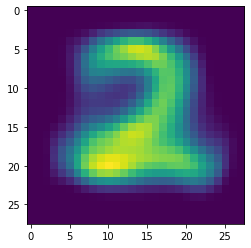

In [184]:
for m in exp_max.means_:
    plt.imshow(np.array(m).reshape(28,28))
    plt.show()